In [1]:
#coding:utf-8
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rc('font', family='SimHei', size=13)

### 1.查看数据情况

In [2]:
data = pd.read_csv('data.csv', encoding='gbk')

In [3]:
data.describe()

,Unnamed: 0,custid,low_volume_percent,middle_volume_percent,take_amount_in_later_12_month_highest,trans_amount_increase_rate_lately,trans_activity_month,trans_activity_day,transd_mcc,trans_days_interval_filter,...,loans_max_limit,loans_avg_limit,consfin_credit_limit,consfin_credibility,consfin_org_count_current,consfin_product_count,consfin_max_limit,consfin_avg_limit,latest_query_day,loans_latest_day
count,4754.000000,4.754000e+03,4752.000000,4752.000000,4754.000000,4751.000000,4752.000000,4752.000000,4752.000000,4746.000000,...,4457.000000,4457.000000,4457.000000,4457.000000,4457.000000,4457.000000,4457.000000,4457.000000,4450.000000,4457.000000
mean,6008.414178,1.690993e+06,0.021806,0.901294,1940.197728,14.160674,0.804411,0.365425,17.502946,29.029920,...,3390.038142,1820.357864,9187.009199,76.042630,4.732331,5.227507,16153.690823,8007.696881,24.112809,55.181512
std,3452.071428,1.034235e+06,0.041527,0.144856,3923.971494,694.180473,0.196920,0.170196,4.475616,22.722432,...,1474.206546,583.418291,7371.257043,14.536819,2.974596,3.409292,14301.037628,5679.418585,37.725724,53.486408
min,5.000000,1.140000e+02,0.000000,0.000000,0.000000,0.000000,0.120000,0.033000,2.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.000000,-2.000000
25%,3106.000000,7.593358e+05,0.010000,0.880000,0.000000,0.615000,0.670000,0.233000,15.000000,16.000000,...,2300.000000,1535.000000,4800.000000,77.000000,2.000000,3.000000,7800.000000,4737.000000,5.000000,10.000000
50%,6006.500000,1.634942e+06,0.010000,0.960000,500.000000,0.970000,0.860000,0.350000,17.000000,23.000000,...,3100.000000,1810.000000,7700.000000,79.000000,4.000000,5.000000,13800.000000,7050.000000,14.000000,36.000000
75%,8999.000000,2.597905e+06,0.020000,0.990000,2000.000000,1.600000,1.000000,0.480000,20.000000,32.000000,...,4300.000000,2100.000000,11700.000000,80.000000,7.000000,7.000000,20400.000000,10000.000000,24.000000,91.000000
max,11992.000000,4.004694e+06,1.000000,1.000000,68000.000000,47596.740000,1.000000,0.941000,42.000000,285.000000,...,10000.000000,6900.000000,87100.000000,87.000000,18.000000,20.000000,266400.000000,82800.000000,360.000000,323.000000


### 2.发现像Unnamed: 0， bank_card_no， source 这几个特征只有1个值，可以直接dropr掉

In [4]:
data.describe(include=[np.object])

,trade_no,bank_card_no,reg_preference_for_trad,source,id_name,latest_query_time,loans_latest_time
count,4754,4754,4752,4754,4478,4450,4457
unique,4754,1,5,1,4309,207,232
top,20180504183828695000000381899323,卡号1,一线城市,xs,李杰,2018-04-14,2018-05-03
freq,1,4754,3403,4754,5,423,134


In [5]:
data.groupby(['reg_preference_for_trad'])['status'].mean()

reg_preference_for_trad
一线城市    0.248310
三线城市    0.258459
二线城市    0.198473
其他城市    0.500000
境外      0.300000
Name: status, dtype: float64

In [6]:
data.shape

(4754, 90)

In [7]:
data.dtypes.value_counts()

float64    70
int64      13
object      7
dtype: int64

### 3.发现一线城市未逾期的比较多，感觉这个特征应该比较有用

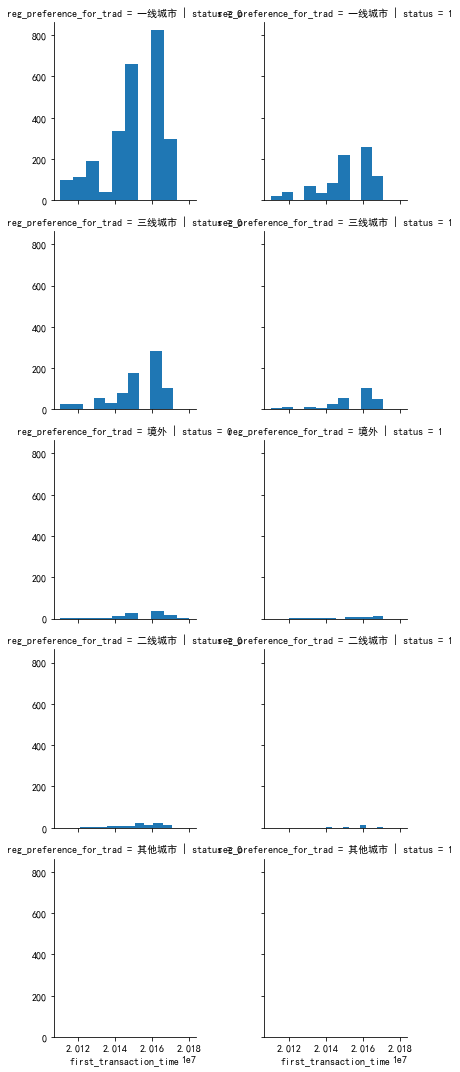

In [8]:
grid = sns.FacetGrid(data, row='reg_preference_for_trad', col='status')
grid.map(plt.hist, 'first_transaction_time')

### 4.看了下特征的相关性

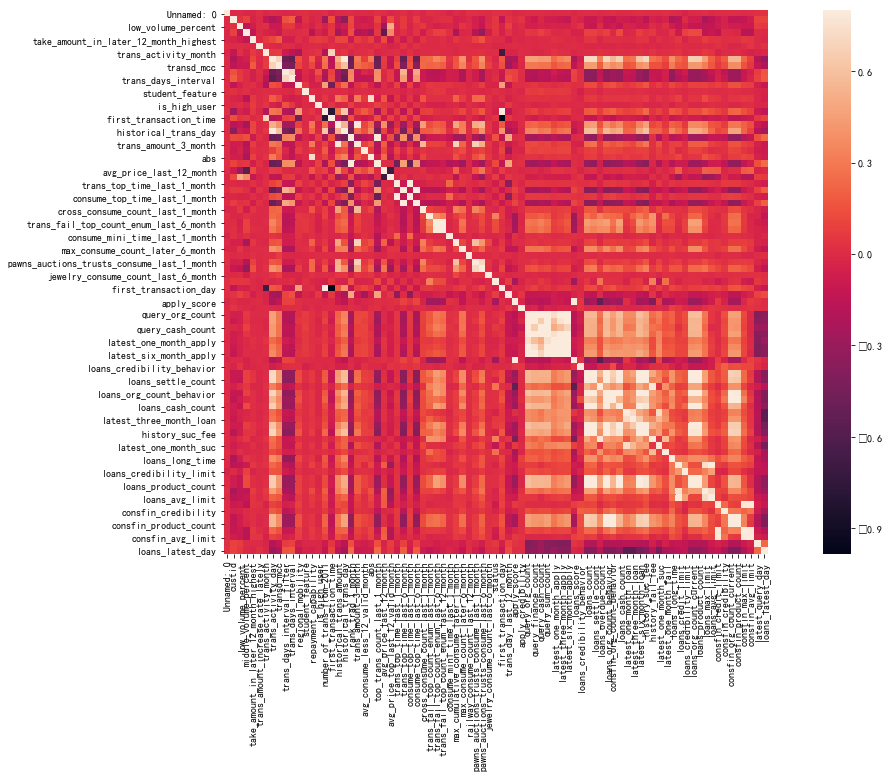

In [9]:
corrmat = data.corr()
f, ax = plt.subplots(figsize=(20, 10))
sns.heatmap(corrmat, vmax=.8, square=True)

In [10]:
corrmat.nlargest(n=10, columns='status')['status']

status                                     1.000000
trans_fail_top_count_enum_last_1_month     0.332256
history_fail_fee                           0.320033
loans_overdue_count                        0.279125
latest_one_month_fail                      0.257269
rank_trad_1_month                          0.147258
trans_fail_top_count_enum_last_6_month     0.133477
trans_fail_top_count_enum_last_12_month    0.117161
top_trans_count_last_1_month               0.117113
trans_day_last_12_month                    0.078892
Name: status, dtype: float64

In [11]:
cols = corrmat.nlargest(n=10, columns='status').index

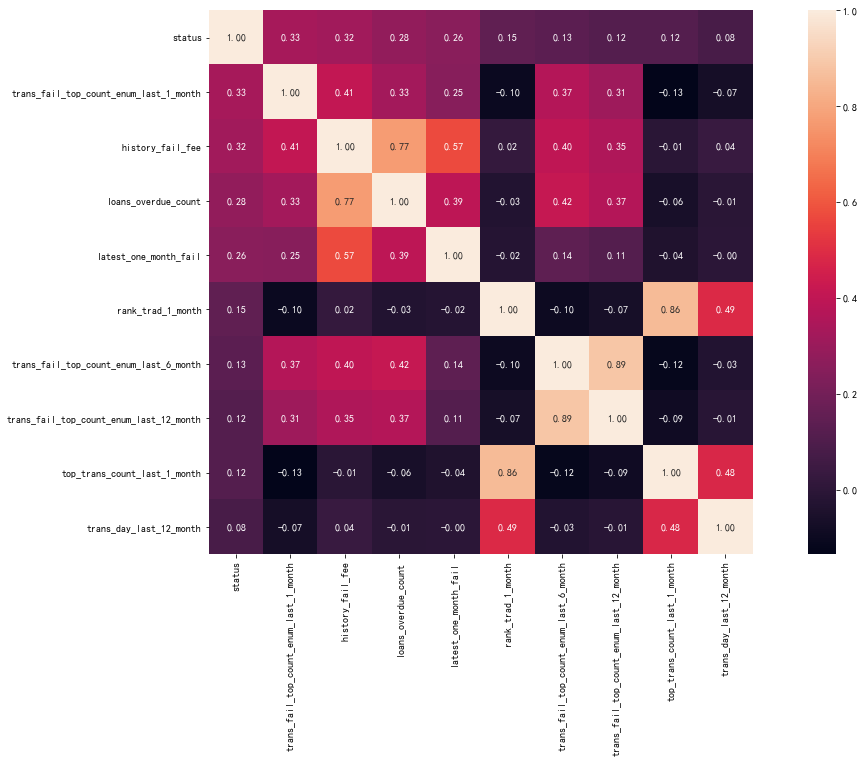

In [12]:
corrmat = data[cols].corr()
f, ax = plt.subplots(figsize=(20, 10))
sns.heatmap(corrmat, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)

### 5.看了下缺失值的情况, student_feature空值不是学生处理，处理成0

In [13]:
missing_data = data.isnull().sum()
missing_percent = data.isnull().sum() / data.isnull().count()
missing_type = data.dtypes
df_missing = pd.concat([missing_data, missing_percent, missing_type], axis=1)
df_missing = df_missing.rename(columns={0: 'count', 1: 'percent', 2: 'type'})

df_missing = df_missing[df_missing['count']>0]

df_missing = df_missing.sort_values(by=['percent'], ascending=False)

In [14]:
data['student_feature'] = data['student_feature'].fillna(0)

In [15]:
df_missing

,count,percent,type
student_feature,2998,0.630627,float64
cross_consume_count_last_1_month,426,0.089609,float64
query_cash_count,304,0.063946,float64
latest_six_month_apply,304,0.063946,float64
latest_one_month_apply,304,0.063946,float64
latest_query_time,304,0.063946,object
query_sum_count,304,0.063946,float64
query_finance_count,304,0.063946,float64
query_org_count,304,0.063946,float64
apply_credibility,304,0.063946,float64


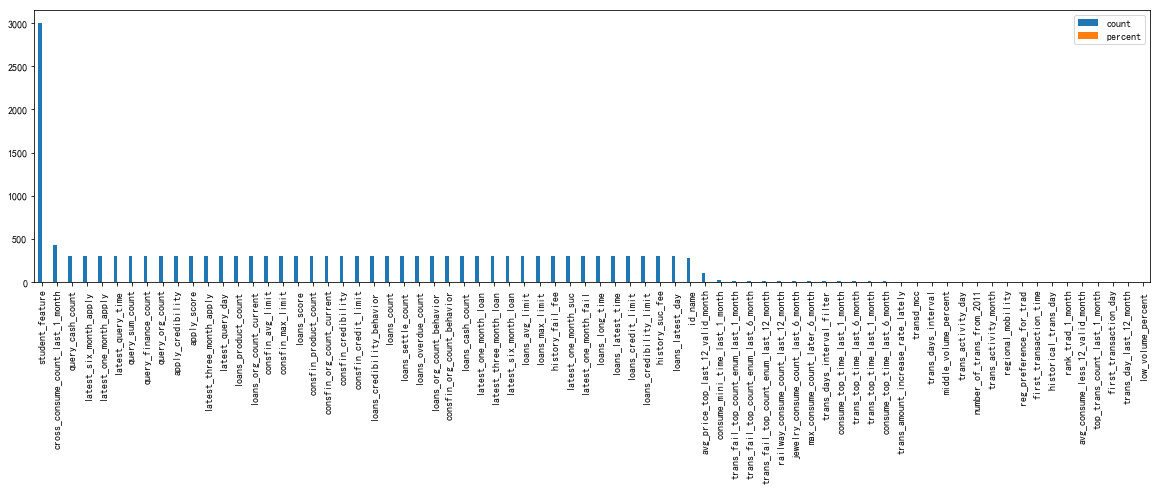

In [16]:
df_missing.plot.bar(figsize=(20, 5))

In [17]:
df_missing.index.intersection(cols)

Index(['loans_overdue_count', 'history_fail_fee', 'latest_one_month_fail',
       'trans_fail_top_count_enum_last_1_month',
       'trans_fail_top_count_enum_last_6_month',
       'trans_fail_top_count_enum_last_12_month', 'rank_trad_1_month',
       'top_trans_count_last_1_month', 'trans_day_last_12_month'],
      dtype='object')

### 6.drop掉感觉没用的特征，用平均数填充空值，把仅有的文本特征处理成one-hoto类型

In [18]:
data = data.dropna(subset=['history_fail_fee'])

In [19]:
data = data.drop(columns=['Unnamed: 0', 'bank_card_no', 'source', 'trade_no', 'custid', 'first_transaction_time', 'id_name', 'latest_query_time', 'loans_latest_time'])

In [20]:
data = data.fillna(data.mean())

In [21]:
data.shape

(4457, 81)

In [22]:
data = pd.get_dummies(data, drop_first=True, dummy_na=True)

In [23]:
data.isnull().sum().max()

0

### 7.用不同模型交叉验证，随机森林和决策树得分最高

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,recall_score,classification_report
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import KFold

KNeighbor 0.6742159141889963
LogisticRegression 0.7778761142152798
LinearSVC 0.7072069581715162
DecisionTree 1.0
RandomForest 0.999775684163302
Nerual 0.7069830954981247


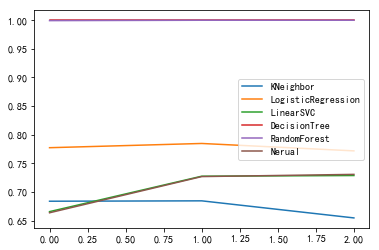

In [25]:
kf = KFold(n_splits=3, random_state=1)
preds = {}
models = [KNeighborsClassifier(n_neighbors=3), LogisticRegression(), LinearSVC(), DecisionTreeClassifier(), RandomForestClassifier(n_estimators=25), MLPClassifier(hidden_layer_sizes=(10, 10, 10), activation='relu', max_iter=1000)]
names = ['KNeighbor','LogisticRegression','LinearSVC','DecisionTree','RandomForest','Nerual']
for i, model in enumerate(models):
    predictions = []
    for tr, va in kf.split(data):
        train_x, train_y = data.iloc[tr], data['status'].iloc[tr]
        valid_x, valid_y = data.iloc[va], data['status'].iloc[va]
        model.fit(train_x, train_y)
        accu = model.score(valid_x, valid_y)
        predictions.append(accu)
    plt.plot(predictions)
    plt.legend(names, loc='best')
    print(names[i], np.mean(predictions))

### 8.不用交叉验证，直接切分训练集和测试集，模型评估随机森林效果最好

In [26]:
X = data.drop('status', axis=1)
y = data['status']

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=.33)

In [28]:
models = [KNeighborsClassifier(n_neighbors=3), LogisticRegression(), LinearSVC(), DecisionTreeClassifier(), RandomForestClassifier(n_estimators=25), MLPClassifier(hidden_layer_sizes=(10, 10, 10), activation='relu', max_iter=1000)]
names = ['KNeighbor','LogisticRegression','LinearSVC','DecisionTree','RandomForest','Nerual']
for i, model in enumerate(models):
    model.fit(X_train, y_train)
    accu = model.score(X_test, y_test)
    print(names[i], accu)

KNeighbor 0.6505778382053025
LogisticRegression 0.7797416723317471
LinearSVC 0.7416723317471108
DecisionTree 0.6947654656696125
RandomForest 0.7858599592114208
Nerual 0.6043507817811012


### 9.做了归一化处理，部分模型得分有所提高

In [29]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaler.fit(X)
X = scaler.transform(X)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [30]:
models = [KNeighborsClassifier(n_neighbors=3), LogisticRegression(), LinearSVC(), DecisionTreeClassifier(), RandomForestClassifier(n_estimators=25), MLPClassifier(hidden_layer_sizes=(10, 10, 10), activation='relu', max_iter=1000)]
names = ['KNeighbor','LogisticRegression','LinearSVC','DecisionTree','RandomForest','Nerual']
for i, model in enumerate(models):
    model.fit(X_train, y_train)
    accu = model.score(X_test, y_test)
    print(names[i], accu)

KNeighbor 0.7117607070020394
LogisticRegression 0.7926580557443915
LinearSVC 0.7919782460910945
DecisionTree 0.6968048946295038
RandomForest 0.7838205302515295
Nerual 0.7933378653976887


### 10.使用随机森林选择特征

In [34]:
X = data.drop('status', axis=1)
y = data['status']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=.33)
from sklearn.ensemble import RandomForestClassifier
cols = X.columns
rfc = RandomForestClassifier(n_estimators=10000, random_state=1, n_jobs=-11)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10000, n_jobs=-11,
            oob_score=False, random_state=1, verbose=0, warm_start=False)

In [36]:
importances = rfc.feature_importances_
imp_result = np.argsort(importances)[::-1]
for i in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (i + 1, 30, cols[i], importances[imp_result[i]]))

 1) low_volume_percent             0.049268
 2) middle_volume_percent          0.048307
 3) take_amount_in_later_12_month_highest 0.041676
 4) trans_amount_increase_rate_lately 0.036935
 5) trans_activity_month           0.025550
 6) trans_activity_day             0.021887
 7) transd_mcc                     0.017037
 8) trans_days_interval_filter     0.017000
 9) trans_days_interval            0.016103
10) regional_mobility              0.016070
11) student_feature                0.016041
12) repayment_capability           0.016023
13) is_high_user                   0.015499
14) number_of_trans_from_2011      0.015373
15) historical_trans_amount        0.015199
16) historical_trans_day           0.015071
17) rank_trad_1_month              0.015008
18) trans_amount_3_month           0.015008
19) avg_consume_less_12_valid_month 0.014737
20) abs                            0.014177
21) top_trans_count_last_1_month   0.014120
22) avg_price_last_12_month        0.014026
23) avg_price_top_las

In [39]:
threshold = 0.01
X_selected = X_train.loc[:, importances > threshold]
X_selected_idx = X_selected.columns
print(f'X_train shape: {X_train.shape}, X_selectd shape: {X_selected.shape}')

X_train shape: (2986, 84), X_selectd shape: (2986, 49)


In [41]:
X_test_selected = X_test[X_selected_idx]

In [42]:
models = [KNeighborsClassifier(n_neighbors=3), LogisticRegression(), LinearSVC(), DecisionTreeClassifier(), RandomForestClassifier(n_estimators=25), MLPClassifier(hidden_layer_sizes=(10, 10, 10), activation='relu', max_iter=1000)]
names = ['KNeighbor','LogisticRegression','LinearSVC','DecisionTree','RandomForest','Nerual']
for i, model in enumerate(models):
    model.fit(X_selected, y_train)
    accu = model.score(X_test_selected, y_test)
    print(names[i], accu)

KNeighbor 0.6777702243371856
LogisticRegression 0.77906186267845
LinearSVC 0.7505098572399728
DecisionTree 0.6940856560163154
RandomForest 0.7858599592114208
Nerual 0.6913664174031271


### 使用49个特征来做预测结果差异不大